In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import datetime, os
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import ResNet50, ResNet152, ResNet50V2, ResNet152V2
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.mobilenet import preprocess_input
from keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

c:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
import matplotlib.pyplot as plt

In [1]:
pip install tensorflow

  Using cached tensorflow-2.15.0-cp39-cp39-win_amd64.whl (2.1 kB)
     ------------------------------------ 300.8/300.8 MB 720.0 kB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
     ---------------------------------------- 1.5/1.5 MB 84.4 kB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
     -------------------------------------- 413.4/413.4 kB 1.4 MB/s eta 0:00:00
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
     -------------------------------------- 938.4/938.4 kB 1.5 MB/s eta 0:00:00
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Using

In [1]:
dataset_path = "D:/5th_sem/mini_project/Dataset"

In [2]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range=0.2,
                fill_mode='nearest', 
                validation_split=0.2
)

NameError: name 'ImageDataGenerator' is not defined

In [6]:
train_gen = train_datagen.flow_from_directory(dataset_path+'Dataset',
                                              target_size = (224,224),
                                              batch_size=2,
                                              class_mode="categorical",
                                              shuffle=True,
                                              seed=4,
                                              interpolation='bilinear',
                                              subset='training'
                                              )

valid_gen = train_datagen.flow_from_directory(dataset_path+'Dataset',
                                              target_size = (224,224),
                                              batch_size=2,
                                              class_mode="categorical",
                                              shuffle=True,
                                              seed=4,
                                              interpolation='bilinear',
                                              subset='validation'
                                              )

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:/5th_sem/mini_project/DatasetDataset'

In [6]:

train_data = tf.data.Dataset.from_generator(lambda: train_gen,
                                            output_types=(tf.float32, tf.float32),
                                            output_shapes=([None
                                                            , 224, 224, 3]
                                                            , [None, train_gen.num_classes])
                                            )
val_data = tf.data.Dataset.from_generator(lambda: valid_gen,
                                          output_types=(tf.float32, tf.float32),
                                          output_shapes=([None
                                                          , 224, 224, 3]
                                                          , [None, valid_gen.num_classes])
                                          )

Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


(224, 224, 3)


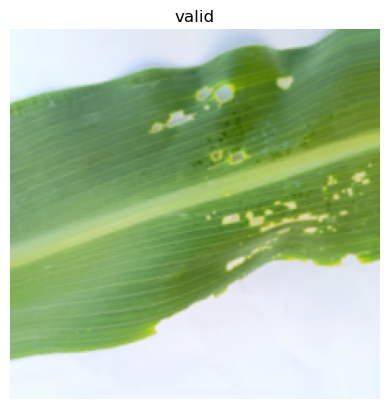

In [7]:
img, label = valid_gen.next()
print(img[0].shape)
plt.imshow(img[0], cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('valid')
plt.show()
     

In [8]:

waktu =  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("MRI-logs", waktu)
logdir = os.path.join("logs", waktu)
     

In [9]:
IMG_SHAPE = (224, 224, 3)
base_model = MobileNetV2(input_shape=IMG_SHAPE,
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

In [9]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1000, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(320, activation='relu')(x)
x=Dropout(0.2)(x)
preds=Dense(2, activation='softmax')(x)

In [10]:

model=Model(inputs=base_model.input, outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

                                                                                                  
 block_1_project_BN (BatchN  (None, 56, 56, 24)           96        ['block_1_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_2_expand (Conv2D)     (None, 56, 56, 144)          3456      ['block_1_project_BN[0][0]']  
                                                                                                  
 block_2_expand_BN (BatchNo  (None, 56, 56, 144)          576       ['block_2_expand[0][0]']      
 rmalization)                                                                                     
                                                                                                  
 block_2_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_2_expand_BN[0][0]']   
          

In [12]:
model.compile(optimizer='SGD', loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
waktu =  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
epochs = 3


logdir = os.path.join("MRI-logs", waktu)
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.01,
                                                 patience = 3,
                                                 factor = 0.25,
                                                 verbose = 1,
                                                 cooldown = 0,
                                                 min_lr = 0.00000001)


early_stopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.005,
                                                 patience = 10,
                                                 verbose = 1,
                                                 restore_best_weights = True)

history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),  
                    epochs=epochs,
                    validation_data = valid_gen,
                    callbacks=[early_stopper, reduce_lr,tensorboard_callback])


model_dir = "model-MRI/2M"+ str(waktu)+".h5"
model.save(model_dir)

Epoch 1/3


203/203 [==============================] - 347s 2s/step - loss: 0.2249 - accuracy: 0.9136 - val_loss: 0.1466 - val_accuracy: 0.9400 - lr: 0.0100
Epoch 2/3
203/203 [==============================] - 213s 1s/step - loss: 0.0509 - accuracy: 0.9753 - val_loss: 0.2499 - val_accuracy: 0.9200 - lr: 0.0100
Epoch 3/3
203/203 [==============================] - 209s 1s/step - loss: 0.0957 - accuracy: 0.9679 - val_loss: 0.1123 - val_accuracy: 0.9500 - lr: 0.0100


c:\Users\Dell\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
loss, acc = model.evaluate(train_data,steps=len(train_gen),verbose=0)
print('Accuracy of Train data: {:.4f} | Loss : {:.4f}'.format(acc,loss),'  ')

loss, acc = model.evaluate(val_data,steps=len(valid_gen),verbose=0)
print('Accuracy of Test data : {:.4f} | Loss : {:.4f}'.format(acc,loss),'  ')

NameError: name 'model' is not defined

In [10]:
model = load_model('model-MRI/2M20231201-161039.h5')

In [11]:
probabilitas = model.predict(valid_gen)
prediction = np.argmax(probabilitas, axis=1)
label = valid_gen.classes
cm=confusion_matrix(label, prediction)

NameError: name 'valid_gen' is not defined

In [13]:
kelas = valid_gen.class_indices

NameError: name 'valid_gen' is not defined

In [18]:
prediction

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [11]:
def load_image(img_path, show=True):
    
    img = load_img(img_path, target_size=(224, 224))
    img_tensor = img_to_array(img)                   
    img_tensor = np.expand_dims(img_tensor, axis=0)          
    img_tensor /= 255.                                     
    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [12]:
def predict(new_img):
    path_img = load_image(new_img)
    pre = model.predict(path_img).transpose()
    return pre

In [13]:
categories = ('notRust','rust')

def classify_images(img):
  pred = predict(img)
  return dict(zip(categories, map(float,pred)))

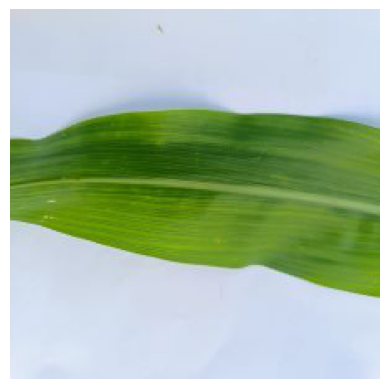

1/1 [==============================] - 0s 74ms/step


C:\Users\Dell\AppData\Local\Temp\ipykernel_26456\1248888681.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return dict(zip(categories, map(float,pred)))


{'notRust': 0.9999494552612305, 'rust': 5.0570150051498786e-05}

In [22]:

classify_images("./1.jpg")

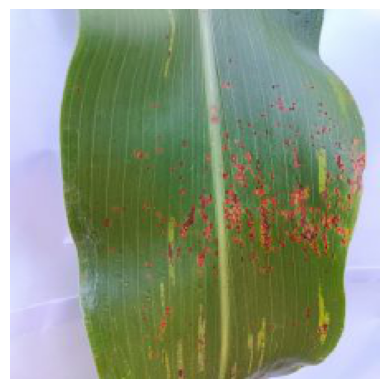

1/1 [==============================] - 0s 73ms/step


C:\Users\Dell\AppData\Local\Temp\ipykernel_26456\1248888681.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return dict(zip(categories, map(float,pred)))


{'notRust': 0.03115767613053322, 'rust': 0.9688423275947571}

In [23]:
classify_images('./2.jpg')

In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("coconut.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\LENOVO\AppData\Local\Temp\tmpu33nkq02\assets


INFO:tensorflow:Assets written to: C:\Users\LENOVO\AppData\Local\Temp\tmpu33nkq02\assets


15273536

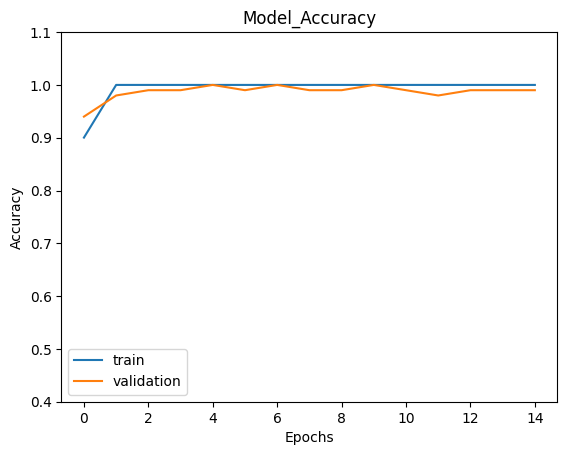

In [13]:
figl=plt.gcf()
plt.plot (history.history['accuracy'])
plt.plot (history.history['val_accuracy'])
plt.axis(ymin=0.4, ymax=1.1)
plt.grid(False)
plt.title('Model_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

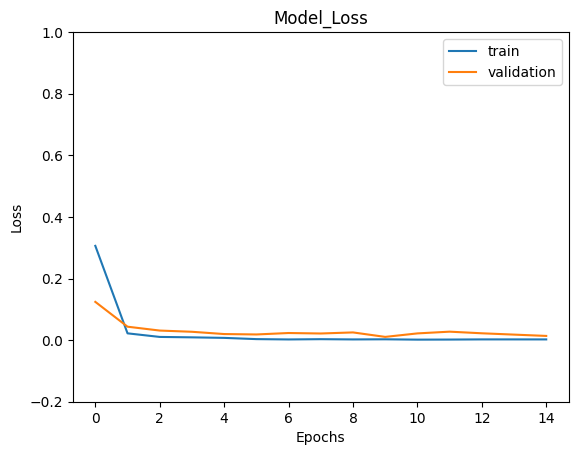

In [14]:
figl=plt.gcf()
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])
plt.axis(ymin=-0.2, ymax=1)
plt.grid(False)
plt.title('Model_Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()